# <div align='center'>Linear Regression</div>

<div align='left'>Linear regression is a linear approach to modeling the relationship between a dependent variable and one or more independent variables ie the model assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x). When there is a single input variable (x), the method is referred to as simple linear regression. When there are multiple input variables, it is referred to as multiple linear regression.</div>

![Image](./Images/LR_.png)

<br/>
<br/>

![Image1](./Images/LR.png)

<br/>
<br/>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [4]:
class Linear_Regression:
    
    def __init__(self,lr, n_iters=100):
        
        self.lr = lr
        self.epochs = n_iters
        self.W = None
        self.Ehist = []
        
    def costFn(self,X_,y_,W_,m):
        
        h = np.dot(X_,W_)
        cost = (1/(2*m))*np.sum(np.square(h-y_))
        return cost
        
    def fit(self,X,y):
        
        # Adding the bias terms as a column to the feature matrix
        X = np.insert(X,0,1,axis=1)
         
        n_samples, n_features = X.shape
        
        W = np.random.normal((n_features,1))
        
        for epoch in range(self.epochs):
            
            self.Ehist.append(self.costFn(X,y,W,n_samples))
            h = np.dot(X,W)
            W = W - self.lr*(1/n_samples)*((X.T).dot(h-y))
            
        self.W = W
    
    def predict(self,X):
        return np.dot(X,self.W)

In [5]:
# Dataset from sklearn
X, y = make_regression(n_samples=1000, n_features=1, n_informative=1 ,noise=10, random_state=0)

clf = Linear_Regression(0.01,1000)
clf.fit(X,y)

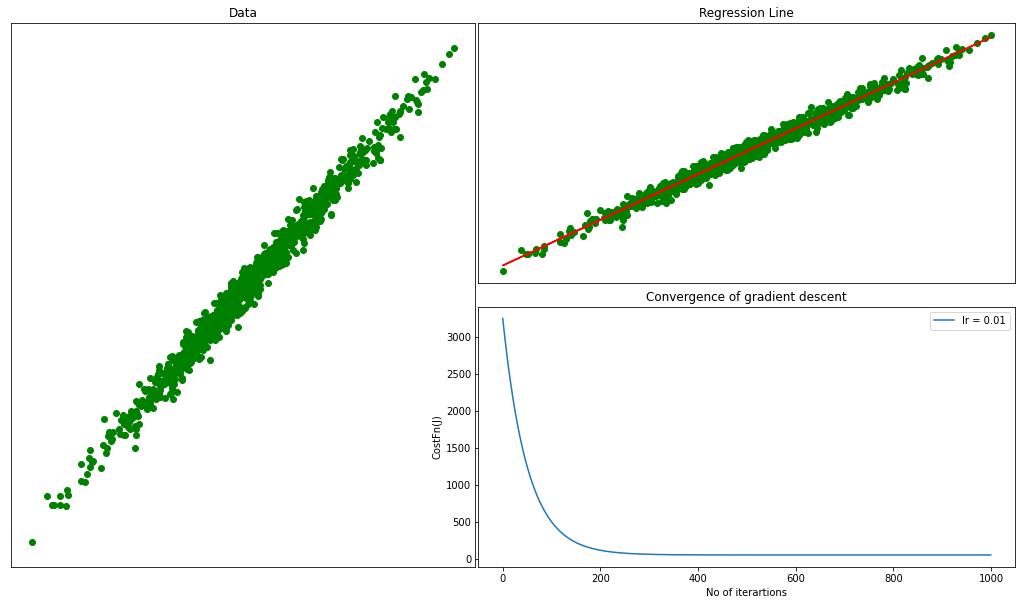

In [9]:
def plot_Regress_Line(X,y,model):
    
    X = np.insert(X,0,1,axis=1)
    h = model.predict(X)
    
    fig = plt.figure(figsize=(15,10),constrained_layout=False)
    gs_1 = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48,wspace=0)
    gs_2 = fig.add_gridspec(nrows=2, ncols=1, left=0.483, right=0.98,hspace=0.09)
    
    axs = fig.add_subplot(gs_1[:,-1])
    axs.scatter(X[:,1],y, c='g')
    axs.set_title('Data')
    axs.set_xticks([])
    axs.set_yticks([])
    
    axs1 = fig.add_subplot(gs_2[0,-1])
    axs1.title.set_text('Regression Line')
    axs1.scatter(X[:,1],y, c='g')
    axs1.plot(X[:,1],h, c='r')
    axs1.set_xticks([])
    axs1.set_yticks([])
    
    axs2 = fig.add_subplot(gs_2[1,-1])
    axs2.plot(model.Ehist,label='lr = 0.01')
    axs2.set_xlabel('No of iterartions')
    axs2.set_ylabel('CostFn(J)')
    axs2.title.set_text('Convergence of gradient descent')
    axs2.legend(loc='upper right')
    
plot_Regress_Line(X,y,clf) 